📊 Dimensiunea setului de date: (35311, 8)


,product ID,Product Title,Merchant ID,Category Label,_Product Code,Number_of_Views,Merchant Rating,Listing Date
0,1,apple iphone 8 plus 64gb silver,1,Mobile Phones,QA-2276-XC,860.0,2.5,5/10/2024
1,2,apple iphone 8 plus 64 gb spacegrau,2,Mobile Phones,KA-2501-QO,3772.0,4.8,12/31/2024
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,Mobile Phones,FP-8086-IE,3092.0,3.9,11/10/2024
3,4,apple iphone 8 plus 64gb space grey,4,Mobile Phones,YI-0086-US,466.0,3.4,5/2/2022
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,Mobile Phones,NZ-3586-WP,4426.0,1.6,4/12/2023



🔍 Valori lipsă per coloană:
product ID           0
Product Title      172
Merchant ID          0
Category Label      44
_Product Code       95
Number_of_Views     14
Merchant Rating    170
Listing Date        59
dtype: int64

🧬 Tipuri de date:
product ID           int64
Product Title       object
Merchant ID          int64
Category Label      object
_Product Code       object
Number_of_Views    float64
Merchant Rating    float64
Listing Date        object
dtype: object
Index(['product ID', 'Product Title', 'Merchant ID', 'Category Label',
       '_Product Code', 'Number_of_Views', 'Merchant Rating', 'Listing Date'],
      dtype='object')


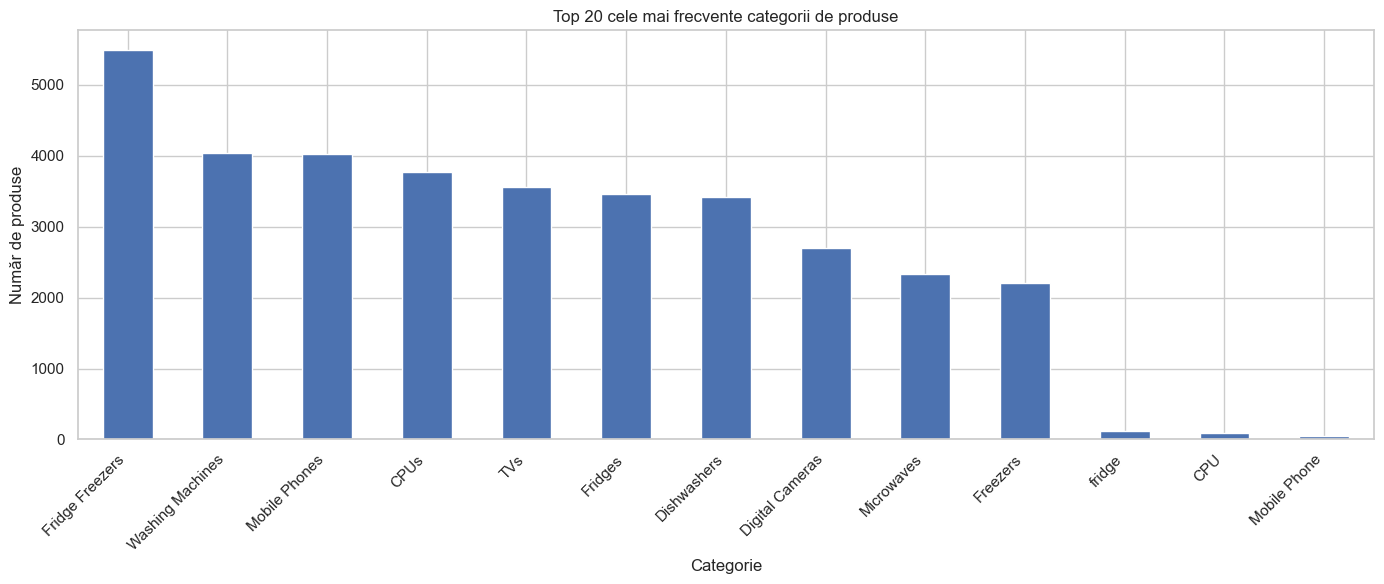


🔤 Exemple de titluri curățate:


,Product Title,Clean Title
0,apple iphone 8 plus 64gb silver,apple iphone 8 plus 64gb silver
1,apple iphone 8 plus 64 gb spacegrau,apple iphone 8 plus 64 gb spacegrau
2,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,apple mq8n2ba iphone 8 plus 64gb 55 12mp sim f...
3,apple iphone 8 plus 64gb space grey,apple iphone 8 plus 64gb space grey
4,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,apple iphone 8 plus gold 55 64gb 4g unlocked s...
5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,apple iphone 8 plus gold 55 64gb 4g unlocked s...
6,apple iphone 8 plus 64 gb space grey,apple iphone 8 plus 64 gb space grey
7,apple iphone 8 plus 64gb space grey,apple iphone 8 plus 64gb space grey
8,apple iphone 8 plus 64gb space grey,apple iphone 8 plus 64gb space grey
9,apple iphone 8 plus 64gb space grey,apple iphone 8 plus 64gb space grey


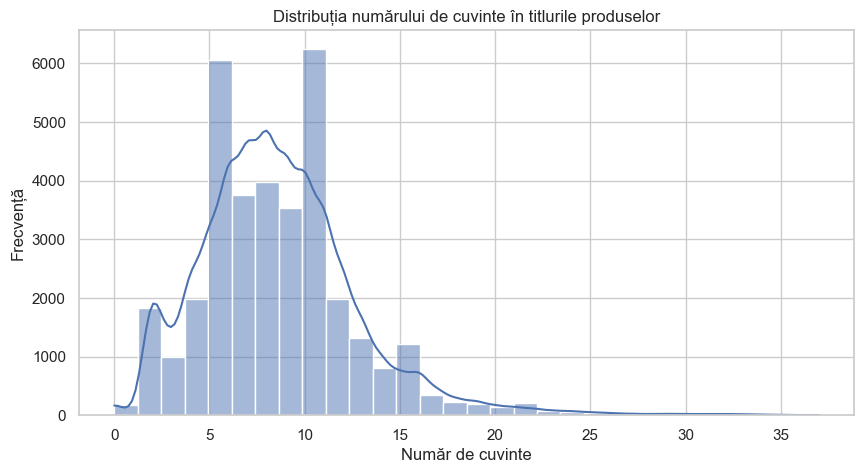

✅ Setul de date curățat a fost salvat în: ../data/products_clean.csv


In [6]:
# 1. Importarea bibliotecilor necesare
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

# Setări pentru afișare
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# 2. Încărcarea setului de date
data_path = '../data/products_features.csv'  # ajustează calea dacă rulezi local
df = pd.read_csv(data_path)
df.columns = df.columns.str.strip()


# 3. Explorare generală
print("📊 Dimensiunea setului de date:", df.shape)
display(df.head())

# 4. Verificarea valorilor lipsă
print("\n🔍 Valori lipsă per coloană:")
print(df.isnull().sum())

# 5. Tipuri de date
print("\n🧬 Tipuri de date:")
print(df.dtypes)

# 6. Distribuția categoriilor
plt.figure(figsize=(14,6))
print(df.columns)

df['Category Label'].value_counts().head(20).plot(kind='bar')

plt.title('Top 20 cele mai frecvente categorii de produse')
plt.xlabel('Categorie')
plt.ylabel('Număr de produse')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 7. Curățarea titlurilor produselor
def clean_title(title):
    if pd.isnull(title):
        return ""
    title = title.lower()  # conversie la litere mici
    title = re.sub(r'[^a-z0-9\s]', '', title)  # eliminare caractere speciale
    title = re.sub(r'\s+', ' ', title).strip()  # eliminare spații multiple
    return title

df['Clean Title'] = df['Product Title'].apply(clean_title)

# 8. Verificare titluri curățate
print("\n🔤 Exemple de titluri curățate:")
display(df[['Product Title', 'Clean Title']].head(10))

# 9. Verificare distribuție lungime titluri
df['Title Length'] = df['Clean Title'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10,5))
sns.histplot(df['Title Length'], bins=30, kde=True)
plt.title('Distribuția numărului de cuvinte în titlurile produselor')
plt.xlabel('Număr de cuvinte')
plt.ylabel('Frecvență')
plt.show()

# 10. Salvarea setului curățat
output_path = '../data/products_clean.csv'
df.to_csv(output_path, index=False)
print(f"✅ Setul de date curățat a fost salvat în: {output_path}")
